<h4>Series</h4>

In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.Series(['python', 'java', 'js', 'cpp', 2])
data

0    python
1      java
2        js
3       cpp
4         2
dtype: object

<h4>1.1 Attributes</h4>

In [3]:
data.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
data.dtype

dtype('O')

In [5]:
data.shape # gives shape.

(5,)

In [6]:
data.size # gives size

5

In [7]:
data.empty # tells if empty

False

In [7]:
data.ndim

1

In [8]:
data.nbytes

40

<h4>Indexing</h4>

In [9]:
data.loc[0] # can use indexing as well as column names

'python'

In [10]:
data.iloc[0] # can use only index.

'python'

In [11]:
data[0]

'python'

<h4>1.3 Windows Function</h4>

In [12]:
data = pd.Series([2,3,4,3,6,7,8,9,23])
data

0     2
1     3
2     4
3     3
4     6
5     7
6     8
7     9
8    23
dtype: int64

In [13]:
data.rolling(window=2).sum()
# takes the 2 values one of current index and 1 from prev index and stores sum at curr index
# thats why at index 0 its NaN becoz there is no prev index for 0.

# data[curr] = data[curr-1] + data[curr]

0     NaN
1     5.0
2     7.0
3     7.0
4     9.0
5    13.0
6    15.0
7    17.0
8    32.0
dtype: float64

In [15]:
data.expanding(min_periods=2).sum()
# takes sum of 2 first values and add it to next index and store there
# cumulative values with 2 window.

0     NaN
1     5.0
2     9.0
3    12.0
4    18.0
5    25.0
6    33.0
7    42.0
8    65.0
dtype: float64

In [16]:
data2 = pd.Series([200,400, 42,4],index=['a','b','c','d'])
data2

a    200
b    400
c     42
d      4
dtype: int64

<h4>2. DataFrame </h4>

<h5>2.1 Indexing</h5>

In [17]:
employees = [
    {"employee_id": 3, "name": "Bob", "department": "Operations", "salary": 48675},
    {"employee_id": 90, "name": "Alice", "department": "Sales", "salary": 11096},
    {"employee_id": 9, "name": "Tatiana", "department": "Engineering", "salary": 33805},
    {"employee_id": 60, "name": "Annabelle", "department": "InformationTechnology", "salary": 37678},
    {"employee_id": 49, "name": "Jonathan", "department": "HumanResources", "salary": 23793},
    {"employee_id": 43, "name": "Khaled", "department": "Administration", "salary": 40454}
]

emp = pd.DataFrame(employees)


In [18]:
emp

,employee_id,name,department,salary
0,3,Bob,Operations,48675
1,90,Alice,Sales,11096
2,9,Tatiana,Engineering,33805
3,60,Annabelle,InformationTechnology,37678
4,49,Jonathan,HumanResources,23793
5,43,Khaled,Administration,40454


In [19]:
emp.index
emp.columns

Index(['employee_id', 'name', 'department', 'salary'], dtype='object')

<h4>2.4 Plotting</h4>


<Axes: xlabel='department'>

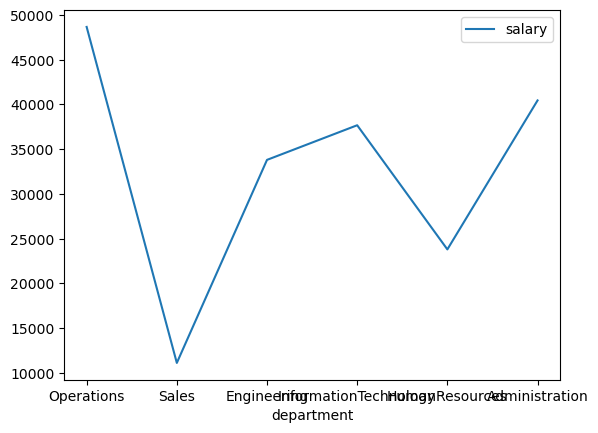

In [20]:
emp.plot('department', 'salary')

<Axes: xlabel='department'>

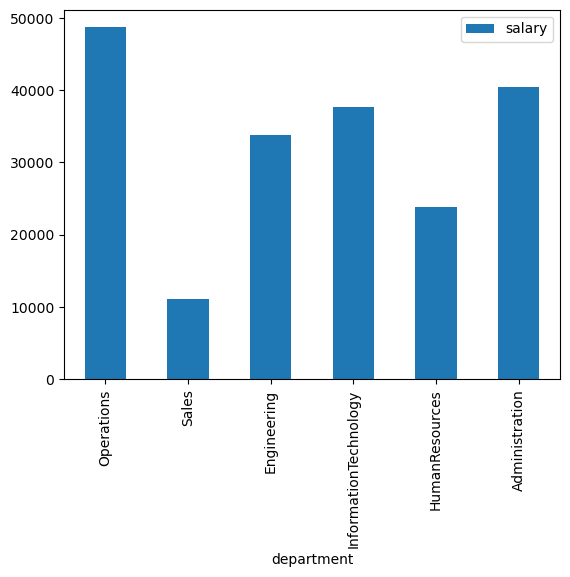

In [21]:
emp.plot(x= 'department', y = 'salary', kind='bar')

<Axes: xlabel='department', ylabel='salary'>

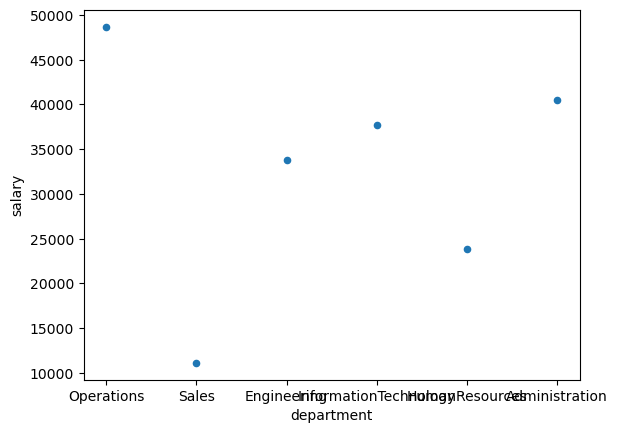

In [22]:
emp.plot(x= 'department', y = 'salary', kind='scatter')

<h5>2.5 Time Series</h5>

In [23]:
dates= pd.date_range('20140401', periods=5)
df = pd.DataFrame({'Dates':dates})

In [24]:
df

,Dates
0,2014-04-01
1,2014-04-02
2,2014-04-03
3,2014-04-04
4,2014-04-05


In [25]:
df['year'] = df['Dates'].dt.year
df

,Dates,year
0,2014-04-01,2014
1,2014-04-02,2014
2,2014-04-03,2014
3,2014-04-04,2014
4,2014-04-05,2014


<h5>4. Reshaping</h5>
4.1 Melt -> Used to convert the wide format to long format for redability

In [26]:
emp

,employee_id,name,department,salary
0,3,Bob,Operations,48675
1,90,Alice,Sales,11096
2,9,Tatiana,Engineering,33805
3,60,Annabelle,InformationTechnology,37678
4,49,Jonathan,HumanResources,23793
5,43,Khaled,Administration,40454


In [27]:
pd.melt(emp)

,variable,value
0,employee_id,3
1,employee_id,90
2,employee_id,9
3,employee_id,60
4,employee_id,49
5,employee_id,43
6,name,Bob
7,name,Alice
8,name,Tatiana
9,name,Annabelle


In [28]:
pd.melt(emp,id_vars='employee_id', value_vars=['department'])

,employee_id,variable,value
0,3,department,Operations
1,90,department,Sales
2,9,department,Engineering
3,60,department,InformationTechnology
4,49,department,HumanResources
5,43,department,Administration


4.2 Pivot > The pivot() function is used to reshaped a given dataframe organised by a index / column values.

This function does not support data aggregation, multiple values will result in a MultiIndex in the columns. 

In [29]:
emp['bonus'] = 1.5*emp['salary']

In [ ]:
emp.pivot(index=["name","employee_id"],columns="department", values=["salary"])
# can pass multiple values in indexes values and columns in list form.

salary                             \
department            Administration Engineering HumanResources   
name      employee_id                                             
Alice     90                     NaN         NaN            NaN   
Annabelle 60                     NaN         NaN            NaN   
Bob       3                      NaN         NaN            NaN   
Jonathan  49                     NaN         NaN        23793.0   
Khaled    43                 40454.0         NaN            NaN   
Tatiana   9                      NaN     33805.0            NaN   

                                                                 
department            InformationTechnology Operations    Sales  
name      employee_id                                            
Alice     90                            NaN        NaN  11096.0  
Annabelle 60                        37678.0        NaN      NaN  
Bob       3                             NaN    48675.0      NaN  
Jonathan  49                            NaN        NaN      NaN  
Khaled    43                            NaN        NaN      NaN  
Tatiana   9                             NaN        NaN      NaN

4.3 Pivot Table

The pivot_table() function is used to create a spreadsheet-style pivot table as dataframe.

In [31]:
emp.pivot_table(index=["name", "department"])


,,bonus,employee_id,salary
name,department,,,
Alice,Sales,16644.0,90,11096
Annabelle,InformationTechnology,56517.0,60,37678
Bob,Operations,73012.5,3,48675
Jonathan,HumanResources,35689.5,49,23793
Khaled,Administration,60681.0,43,40454
Tatiana,Engineering,50707.5,9,33805


In [32]:

df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Alice', 'Bob'],
    'year': [2020, 2020, 2021, 2021],
    'score': [85, 90, 85, 95]
    
})

# Pivot: Year as columns, names as rows, and scores as values
pivoted = df.pivot(index='name', columns='year', values='score')
print(pivoted)


year   2020  2021
name             
Alice    85    85
Bob      90    95


In [33]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ivan', 'Jack',
             'Kira', 'Leo', 'Mia', 'Nina', 'Oscar', 'Paul', 'Quinn', 'Rachel', 'Steve', 'Tina'],
    'gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M',
               'F', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'F'],
    'department': ['HR', 'IT', 'Finance', 'IT', 'HR', 'Finance', 'HR', 'Marketing', 'IT', 'HR',
                   'Finance', 'Marketing', 'Finance', 'IT', 'Marketing', 'HR', 'IT', 'Finance', 'IT', 'HR'],
    'salary': [45000, 70000, 65000, 72000, 46000, 64000, 47000, 52000, 71000, 48000,
               63000, 54000, 62000, 73000, 55000, 49000, 74000, 61000, 75000, 50000],
    'experience': [2, 5, 4, 6, 3, 7, 1, 5, 8, 2,
                   6, 4, 5, 3, 7, 2, 6, 4, 9, 3],
    'location': ['Delhi', 'Mumbai', 'Bangalore', 'Pune', 'Delhi', 'Chennai', 'Delhi', 'Hyderabad', 'Mumbai', 'Delhi',
                 'Bangalore', 'Hyderabad', 'Chennai', 'Pune', 'Mumbai', 'Bangalore', 'Pune', 'Delhi', 'Chennai', 'Hyderabad']
}
empl = pd.DataFrame(data)
data = pd.DataFrame(data)

# data[data['name']=='Hannah'].loc[:,'department']

# updating particular cells different methods. 


data['department'][data['name']=='Hannah'] = 'Finance'
# data.loc[data['name']=='Hannah','department'] = 'Marketing'
# data.iloc[7,2] = 'Finance' # 
data

data.pivot_table(index=["gender","department"],aggfunc=min)


/tmp/ipykernel_9921/796941073.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['department'][data['name']=='Hannah'] = 'Finance'


experience   location     name  salary
gender department                                        
F      Finance              4  Bangalore   Hannah   52000
       HR                   1  Bangalore    Alice   45000
       IT                   3       Pune     Nina   73000
M      Finance              4  Bangalore  Charlie   64000
       HR                   2      Delhi     Jack   48000
       IT                   5    Chennai      Bob   70000
       Marketing            4  Hyderabad      Leo   54000

In [34]:
empl

,name,gender,department,salary,experience,location
0,Alice,F,HR,45000,2,Delhi
1,Bob,M,IT,70000,5,Mumbai
2,Charlie,M,Finance,65000,4,Bangalore
3,David,M,IT,72000,6,Pune
4,Eva,F,HR,46000,3,Delhi
5,Frank,M,Finance,64000,7,Chennai
6,Grace,F,HR,47000,1,Delhi
7,Hannah,F,Marketing,52000,5,Hyderabad
8,Ivan,M,IT,71000,8,Mumbai
9,Jack,M,HR,48000,2,Delhi


4.4 Cross Tab 

Compute a simple cross tabulation of two (or more) factors.

By default computes a frequency table of the factors unless an array of values and an aggregation function are passed

In [35]:
pd.crosstab(empl['gender'], empl['department'])
# by default gives the table of the number of males and females in each department.

department,Finance,HR,IT,Marketing
gender,,,,
F,3,5,2,1
M,2,1,4,2


4.5 Cut

The pandas.cut() function is used to segment and sort data values into discrete bins or intervals. It's very useful when you want to group continuous data into categories.

In [36]:
df = pd.DataFrame({'Age': np.random.randint(1,100,30)})

df['bins'] = pd.cut(x=df['Age'], bins=[1,20,40,60,80,100], 
    labels=['kids', 'young', 'adult','old','very old'])

df

,Age,bins
0,36,young
1,53,adult
2,8,kids
3,20,kids
4,12,kids
5,16,kids
6,51,adult
7,8,kids
8,76,old
9,60,adult


In [37]:
gender = []
for i in range(30):
    if i%2==0:
        gender.append('Male')
    else:
        gender.append('Female')



In [38]:
df.insert(2,'Gender', gender)

In [39]:
df
pd.crosstab(df['Gender'], df['bins'])

bins,kids,young,adult,old,very old
Gender,,,,,
Female,4,3,4,2,2
Male,5,3,2,3,2


In [46]:
# I want to get total number of female kids

# df[df['Gender']=='Female'][df['bins']=='kids']
df[(df['Gender']=='Female') & (df['bins']=='kids')]

# df.loc[df['Gender']=='Female'][df['bins']=='kids']

df.loc[df['bins']=='kids']

,Age,bins,Gender
2,8,kids,Male
3,20,kids,Female
4,12,kids,Male
5,16,kids,Female
7,8,kids,Female
11,4,kids,Female
12,12,kids,Male
16,18,kids,Male
22,4,kids,Male


# Concatinate
Concatinating 2 dataframes. 

In [48]:
data = {
    'student_id': [1, 2, 3, 4],
    'name': ['Mason', 'Ava', 'Taylor', 'Georgia'],
    'age': [8, 6, 15, 17]
}

df1 = pd.DataFrame(data)
data = {
    'student_id': [5, 6],
    'name': ['Leo', 'Alex'],
    'age': [7, 7]
}

df2 = pd.DataFrame(data)

df_combined = pd.concat((df1,df2), ignore_index=True)
df_combined


,student_id,name,age
0,1,Mason,8
1,2,Ava,6
2,3,Taylor,15
3,4,Georgia,17
4,5,Leo,7
5,6,Alex,7
